# Correlations

It is sometimes quite insightful to plot correlations using pairplots.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
sns.set_theme() # we use seaborn for beautiful and simple plots

# Load the experimental data

In [3]:
instances = pd.read_json("./data/instances.json")
instances.sample(5)

,graph_id,vertices_amount,edges_amount,instance_type,instance
1060,1061,21,198,random,See sqllite database using graph_id
657,658,22,169,celestial,See sqllite database using graph_id
1104,1105,26,174,random,See sqllite database using graph_id
191,192,10,17,celestial,See sqllite database using graph_id
951,952,29,179,celestial,See sqllite database using graph_id


In [4]:
solutions = pd.read_json("./data/solutions.json")
solutions.sample(10)

,graph_id,solution_id,MS,TE,BE,solver_type,solver,solution_type,date,runtime,has_optimality_certificate,solution
16029,785,26928,1058.043941,13236.785193,842.206746,APX,APX (MS),MS,2020-08-13 12:34:18.109679,3.597043,False,See sqlite database using solution_id
31016,1661,44527,541.522372,814.153989,219.427936,CP-2,CP-2 (BE),BE,2021-01-08 17:57:20.991555,0.008569,True,See sqlite database using solution_id
9410,437,13036,953.559571,2322.933630,182.079616,CP-2,CP-2 (BE),BE,2020-08-13 12:34:32.993242,2.435682,True,See sqlite database using solution_id
31872,1702,40968,673.594353,2207.247982,355.635017,ILS,ILS (TE),TE,2021-01-08 17:57:05.946993,0.021545,False,See sqlite database using solution_id
21411,1035,27294,1123.066520,7980.888193,933.153876,APX,APX (MS),MS,2020-12-21 15:09:00.295965,0.446844,False,See sqlite database using solution_id
25420,1272,31997,1579.928785,19881.537773,787.926210,Greedy,Greedy (BE),BE,2021-01-02 18:23:28.962725,0.507121,False,See sqlite database using solution_id
14119,685,8854,573.127283,10364.562525,566.945241,CP-1,CP-1 (MS),MS,2020-08-13 12:34:18.111074,1501.379742,False,See sqlite database using solution_id
4275,167,5936,670.645853,3184.348317,475.335963,MIP-1,MIP-1 (MS),MS,2020-08-13 12:34:18.109758,900.086830,False,See sqlite database using solution_id
16469,808,38339,1070.383802,14501.566266,805.131699,ILS,ILS (MS),MS,2021-01-07 23:47:12.165594,10.708560,False,See sqlite database using solution_id
5943,254,34524,781.515304,3237.781087,315.395623,GA,GA (BE),BE,2020-08-13 12:34:32.993169,23.965528,False,See sqlite database using solution_id


In [5]:
must_have_solvers = ["CP-1 (MS)", "GA (TE)"]
solvers_for_graph_id = solutions.groupby(["graph_id"])["solver"].unique()
def are_superset(s):
    return set(must_have_solvers).issubset(set(s))
graph_ids_to_consider = list(solvers_for_graph_id[solvers_for_graph_id.apply(are_superset)].index)

In [6]:
results = solutions.merge(instances, left_on="graph_id", right_on="graph_id")[["graph_id", "instance_type", "MS", "TE", "BE", "edges_amount", "vertices_amount"]]
results = results[results["graph_id"].isin(graph_ids_to_consider)]
results = results.groupby(["graph_id"]).min()
results

,instance_type,MS,TE,BE,edges_amount,vertices_amount
graph_id,,,,,,
1,celestial,273.032986,768.463967,164.595938,15,6
2,celestial,233.228700,821.139560,164.688861,15,6
3,celestial,256.079902,793.359902,152.924449,15,6
4,celestial,273.733500,675.098767,171.931792,14,6
5,celestial,250.127735,787.109527,171.124965,15,6
...,...,...,...,...,...,...
1781,random,472.722221,5534.582810,471.484523,136,17
1782,random,486.029525,6440.510276,473.940907,136,17
1783,random,489.507930,6375.568469,476.121014,136,17


In [7]:
results["Average degree"] = (2*results["edges_amount"])/results["vertices_amount"]

In [8]:
results.rename(columns={"instance_type": "Type", "edges_amount": "Number of edges", "vertices_amount": "Number of vertices", "MS": "Makespan", "TE": "Total Energy", "BE": "Bottleneck Energy"}, inplace=True)

In [9]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"]})

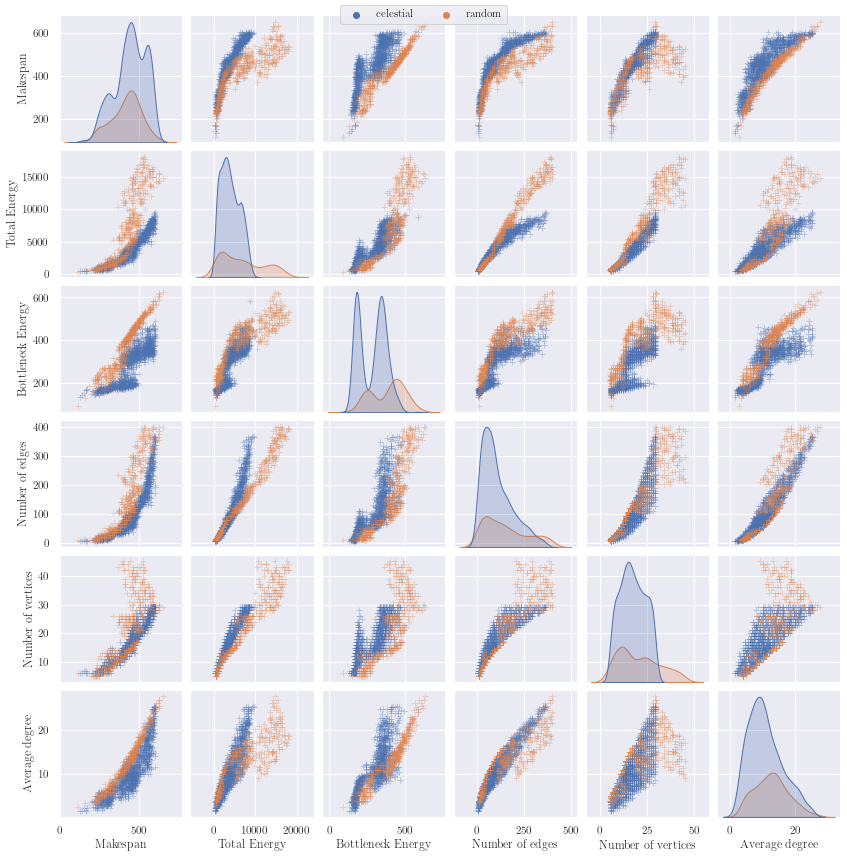

In [10]:
g = sns.pairplot(data=results, hue="Type",plot_kws=dict(marker="+", linewidth=1, alpha=0.3), corner=False, height=2)
g._legend.remove()
handles = g._legend_data.values()
labels = g._legend_data.keys()

g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2)

#g.fig.subplots_adjust(top=0.98, bottom=0.08)
#plt.tight_layout()
#plt.legend(loc='upper right')
for ext in ["pdf", "png"]:
    plt.savefig(f"./output/plot_pairplot_instances.{ext}", dpi=300)
plt.show()